In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ase.visualize import view
from ase.io import read
from ase.build import mx2
from abtem import show_atoms, FrozenPhonons

from scipy.constants import value, hbar, Boltzmann
cwd = os.getcwd()
print(f"Current directory: {cwd}")

Current directory: /home/niflheim/s192943/bachelor/NeuralNetwork_HRTEM/Notebooks


# Structures

Show the generated structures. Change \verb|n| for different structures

In [2]:
data_dir = "../workflow/simulation_data/experimental_data-test/"
NO_SUPPORT = True

n = 3
imagenumber = "{:04d}".format(n)
model_type = "model"
if NO_SUPPORT:
#     model_type = "model_no_support"
    model_type = "model"
model = read(os.path.join(data_dir, model_type,  model_type + f"_{imagenumber}.traj"))
view(model)

<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>

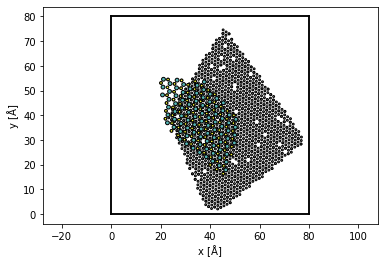

In [3]:
show_atoms(model)

# Waves and Images

In [4]:
image = np.load(os.path.join(data_dir, "images_labels", "image_label_000_0000.npz"))
for key in image:
    print(key)

image
label


In [5]:
image['label'].shape

(1, 640, 640, 2)

In [6]:
points_dir = "../workflow/simulation_data/moreconfigs-test/"
labeldata = np.load(os.path.join(points_dir, "points", "points_0000.npz"))
for key in labeldata:
    print(key)

sites
positions
classes


(520, 2)


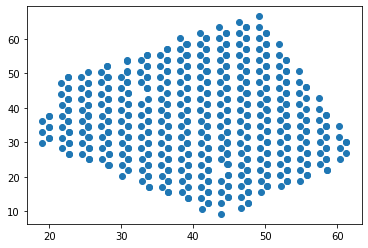

In [7]:
test = labeldata["positions"]
print(test.shape)
plt.scatter(*test.T)

# Plot af fit (Skal opdateres senere)

In [8]:
n = 0
imagenumber = "{:04d}".format(n)
data_dir = "../workflow/simulation_data/experimental_data_high_temp/"
fit_params = np.load(os.path.join(data_dir, "fitting_parameters", "fit_params.npz"), allow_pickle=True)
label = np.load(os.path.join(data_dir, "images_labels", f"image_label_000_{imagenumber}.npz"), allow_pickle=True)
wave = label["label"].squeeze()
for key in fit_params:
    print(key)

temp
layers
sigmas_pred
sigmas_gt
peaks_pred
peaks_gt


In [9]:
sigmas = fit_params["sigmas_gt"][n]
peaks = fit_params["peaks_gt"][n]

In [10]:
real, imag = wave[...,0], wave[...,1]

# Show Frozen Phonons

In [11]:
def get_phonon_dict(atoms, debyeTemp, Temp):
    
    std_dict = {}
    u_to_kg = value('atomic mass unit-kilogram relationship')
    
    for atom in atoms:
        symbol = atom.symbol 
        
        if symbol not in std_dict:
            m = atom.mass * u_to_kg
        
            S = np.sqrt(
                (3*hbar**2)/(2*m*Boltzmann*debyeTemp)*(1/4 + Temp / debyeTemp)
            )
            std_dict[symbol] = S * 1e10 # Angstrom

    return std_dict

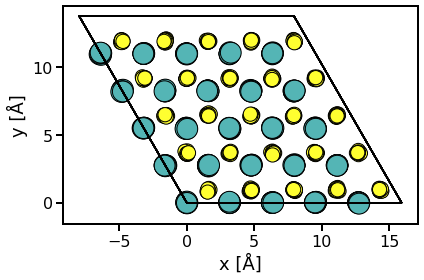

In [12]:
debye = 580
temp = 400
configs = 10

fontsize = 18


prototype = mx2("MoS2")
sample = prototype.repeat((5,5,1))

material_dict = get_phonon_dict(sample, debye, temp)

FP = FrozenPhonons(sample, 10, material_dict)


fig, ax = plt.subplots(1,1)

for s in ax.spines.values():
    s.set_linewidth(2)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.tick_params(axis='both', which='major', labelsize=fontsize-2, length=7, width=2)

if not os.path.exists("gifs"):
    os.mkdir("gifs")

for i in range(configs):
    
    atoms_config = next(iter(FP))
    
        
    
    show_atoms(atoms_config, ax=ax)
    fname = "gifs/frozen_phonon_{:02d}".format(i+1)
    plt.tight_layout()
    plt.savefig(fname, dpi=300)
    

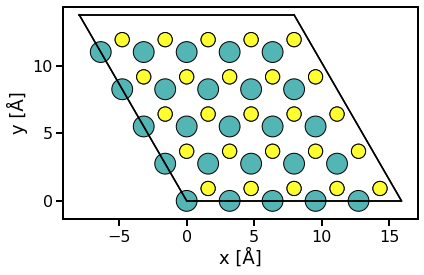

In [13]:
fig, ax = plt.subplots(1,1)

for s in ax.spines.values():
    s.set_linewidth(2)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.tick_params(axis='both', which='major', labelsize=fontsize-2, length=7, width=2)
show_atoms(sample, ax=ax)
fname = "gifs/sample"

plt.tight_layout()
plt.savefig(fname, dpi=300)
plt.show()

In [25]:
Mo = material_dict["Mo"]
sampling = 0.10143599368519367 #pixels/Å
sigma = 2.2 # pixels
(sigma / sampling)**(-1)

0.04610726985690621

In [24]:
1*sampling

0.10143599368519367